In [1]:
%load_ext autoreload
%autoreload 2
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import sys

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.utils import utils

importlib.reload(utils)
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

from src.analysis import BehavletsEncoding, GeomClustering
from src.visualization import GameVisualizer


# Behavlet encodings of all games

Specific behavlets algorithms are implemented in the `Behavlets` class. Higher level functionality and preferred access point is through the `BehavletsEncoding` class.


In [77]:
Beh_encodings = BehavletsEncoding(verbose=True)
vis = GameVisualizer()


for level_id in Beh_encodings.reader.level_df.level_id:
    try:
        Beh_encodings.calculate_behavlets(level_id=level_id)
    except ValueError:
        continue

print(f"Calculated {len(Beh_encodings.instance_details)} behavlets in {len(Beh_encodings.reader.level_df)} levels:")
for behavlet in Beh_encodings.behavlets.values():
    print(f"{behavlet.full_name} - {Beh_encodings.instance_details.loc[Beh_encodings.instance_details['behavlet_name'] == behavlet.name].shape[0]} instances")

Beh_encodings.summary_results.head()
# Beh_encodings.instance_details.head()

INFO - src.analysis.behavlets_encoding - Initializing BehavletsEncoding
INFO - src.analysis.behavlets - Initializing Aggression1
INFO - src.analysis.behavlets - Initializing Aggression3
INFO - src.analysis.behavlets - Initializing Aggression4
INFO - src.analysis.behavlets - Initializing Aggression6
INFO - src.analysis.behavlets_encoding - Behavlets initialized: ['Aggression1', 'Aggression3', 'Aggression4', 'Aggression6']


Calculated 5257 behavlets in 938 levels:
Aggression 1 - Hunt close to ghost home - 214 instances
Aggression 3 - Ghost kills - 2635 instances
Aggresssion 4 - Hunt even after powerpill finishes - 219 instances
Aggression 6 - Chase Ghosts or Collect Pellets - 2189 instances


,level_id,user_id,Aggression1_value,Aggression1_instances,Aggression1_value_per_instance,Aggression1_gamesteps,Aggression1_timesteps,Aggression3_value,Aggression3_instances,Aggression3_gamesteps,...,Aggression4_instances,Aggression4_value_per_pill,Aggression4_gamesteps,Aggression4_timesteps,Aggression4_died,Aggression6_value,Aggression6_instances,Aggression6_value_per_pill,Aggression6_gamesteps,Aggression6_timesteps
1338,1338,74,0,0,[],[],[],5,5,"[(1243323, 1243343), (1243329, 1243349), (1243...",...,0,"[0, 0, 0, 0]","[None, None, None, None]","[None, None, None, None]","[False, None, False, False]",0.180000,3,"[0.03, 0.06, 0, 0.45]","[(1243479, 1243579), (1243681, 1243781), None,...","[(25.690000534057617, 30.690000534057617), (35..."
1337,1337,74,0,0,[],[],[],5,5,"[(1242194, 1242214), (1242460, 1242480), (1242...",...,0,"[0, 0, 0, 0]","[None, None, None, None]","[None, None, None, None]","[None, False, False, False]",0.230556,3,"[0.025, 0.45, 0, 0.21666666666666667]","[(1242731, 1242851), (1242466, 1242586), None,...","[(53.88999938964844, 59.88999938964844), (40.6..."
1336,1336,74,0,0,[],[],[],3,3,"[(1241274, 1241294), (1241346, 1241366), (1241...",...,1,"[0, 0, 3, 0]","[None, None, (1241289, 1241298), None]","[None, None, (21.979999542236328, 22.430000305...","[None, False, False, False]",0.475000,3,"[0.35, 0.6, 0.475, 0]","[(1241492, 1241532), (1241327, 1241367), (1241...","[(32.130001068115234, 34.130001068115234), (23..."
1335,1335,74,0,0,[],[],[],6,6,"[(1239881, 1239901), (1239917, 1239937), (1240...",...,0,"[0, 0, 0, 0]","[None, None, None, None]","[None, None, None, None]","[None, False, False, False]",0.479167,4,"[0.26666666666666666, 0.6, 0.4666666666666667,...","[(1240390, 1240450), (1240202, 1240262), (1240...","[(37.09000015258789, 40.09000015258789), (27.6..."
1334,1334,74,0,0,[],[],[],4,4,"[(1238673, 1238693), (1238889, 1238909), (1238...",...,0,"[0, 0, 0, 0]","[None, None, None, None]","[None, None, None, None]","[False, None, False, False]",0.150000,3,"[0.0125, 0, 0.225, 0.2125]","[(1239147, 1239227), None, (1238891, 1238971),...","[(35.689998626708984, 39.68999862670898), None..."


In [78]:
Beh_encodings.instance_details.head()

# Beh_encodings.summary_results.head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
0,1338,74,Aggression3,0,1243323,1243343,18.389999,18.389999,1243333.0,"(-10.502352714539, -12.367035865784)",18.389999,NaN,NaN,NaN
1,1338,74,Aggression3,1,1243329,1243349,18.690001,18.690001,1243339.0,"(-8.1967010498047, -12.500619888306)",18.690001,NaN,NaN,NaN
2,1338,74,Aggression3,2,1243340,1243360,19.240000,19.240000,1243350.0,"(-7.4964542388916, -9.4635725021362)",19.240000,NaN,NaN,NaN
3,1338,74,Aggression3,3,1243475,1243495,25.990000,25.990000,1243485.0,"(-12.504857063293, 9.2714891433716)",25.990000,NaN,NaN,NaN
4,1338,74,Aggression3,4,1243680,1243700,36.240002,36.240002,1243690.0,"(11.712596893311, 12.501050949097)",36.240002,NaN,NaN,NaN


## Data Exploration


## Aggression 1 - Hunt close to ghost house


In [130]:
BEHAV_TYPE = "Aggression1"
VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()



,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
189,1312,74,Aggression1,0,1215685,1215701,50.990002,51.790001,NaN,NaN,NaN,NaN,NaN,16.0
194,1311,74,Aggression1,0,1214464,1214497,40.540001,42.189999,NaN,NaN,NaN,NaN,NaN,33.0
226,1306,74,Aggression1,0,1208906,1208946,18.990000,20.990000,NaN,NaN,NaN,NaN,NaN,40.0
315,1293,74,Aggression1,0,1195375,1195393,38.790001,39.689999,NaN,NaN,NaN,NaN,NaN,18.0
349,1283,80,Aggression1,0,1183774,1183794,16.090000,17.090000,NaN,NaN,NaN,NaN,NaN,20.0


In [ ]:
samples = Beh_encodings.instance_details[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE].sample(5, random_state=42)
for i,sample in samples.iterrows():
    _ = Beh_encodings.create_replay(sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}")

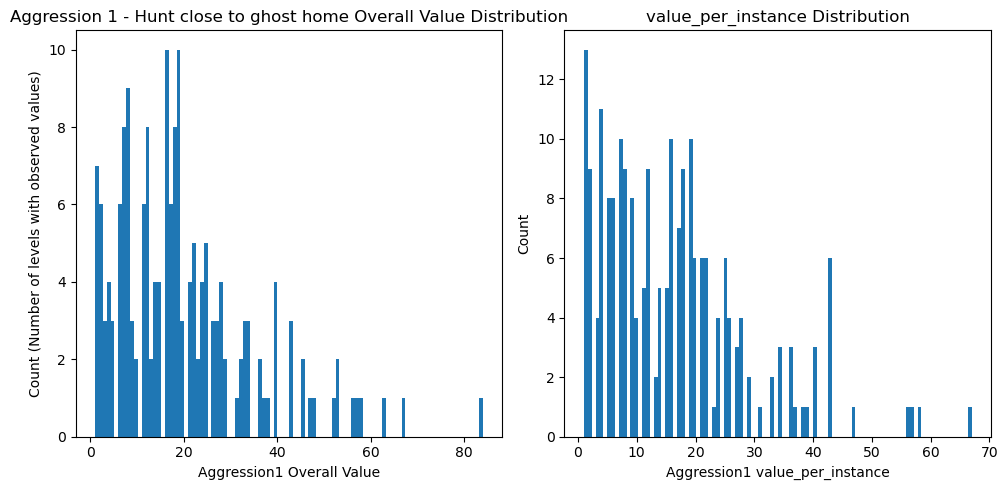

In [131]:
# BEHAV_TYPE = "Aggression1"

values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0] ## Filtering out 0 values
# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(values, bins=100)  
# axs[0].violinplot(values) 
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution")


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")
plt.tight_layout()
plt.show()

# Beh_encodings.summary_results[
#     (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] < 200)
#     & (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] > 50)
# ].loc[
#     :,
#     [
#         "level_id",
#         f"{BEHAV_TYPE}_gamesteps",
#         f"{BEHAV_TYPE}_timesteps",
#         f"{BEHAV_TYPE}_value",
#     ],
# ]

In [135]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv'):
    Clustering.affinity_matrix = np.loadtxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', delimiter=',')
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
    np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')



INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw
INFO - src.analysis.geom_clustering - Fitting clustering model with 214 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.01 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 4 clusters


Number of trajectories: 214


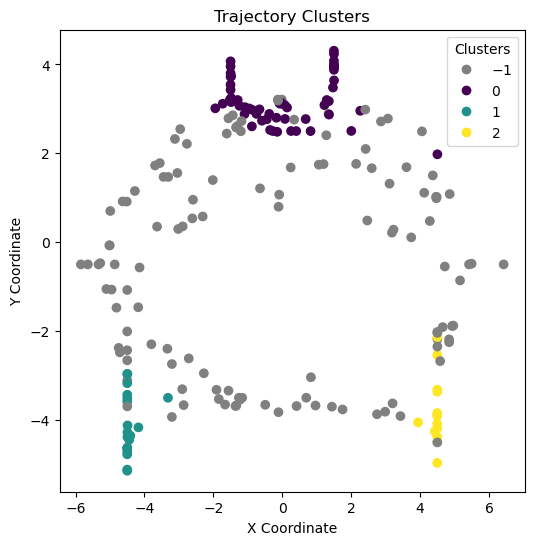

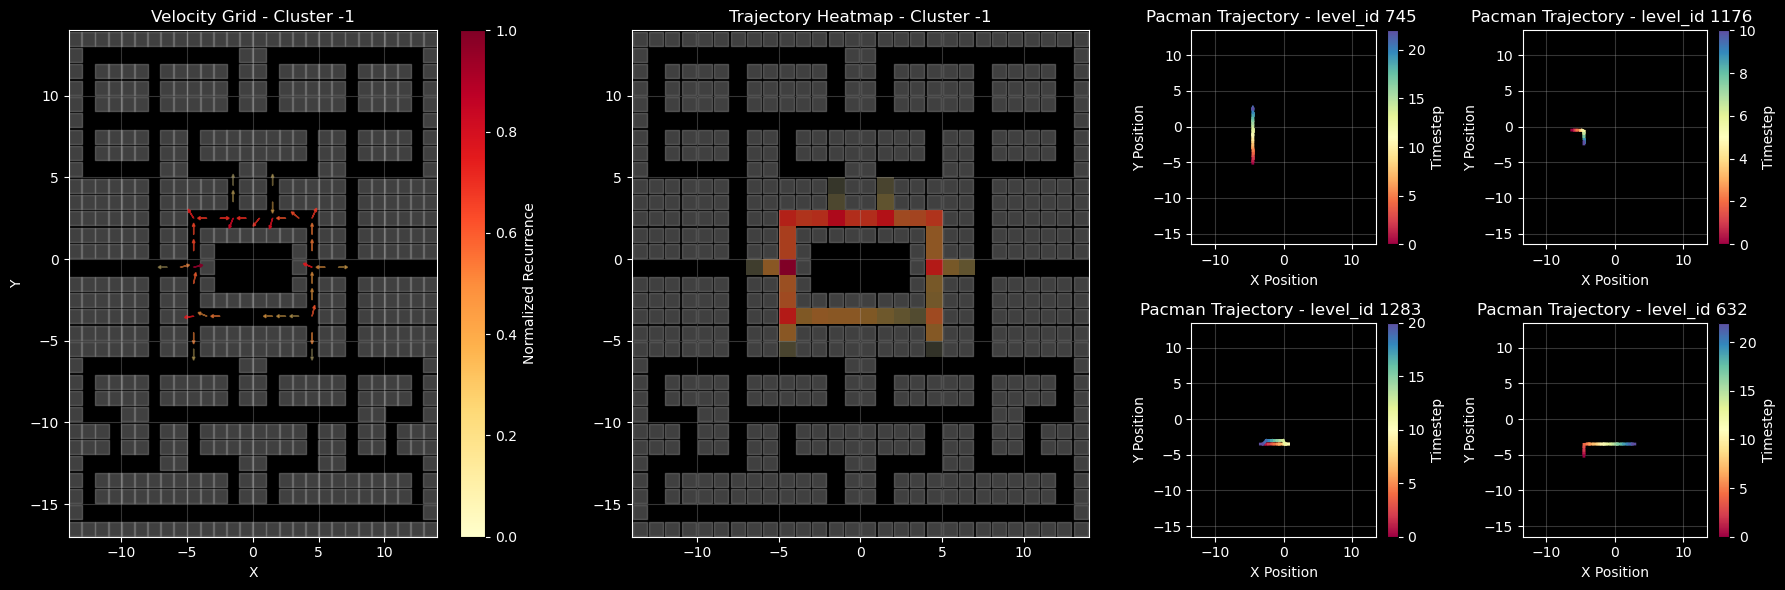

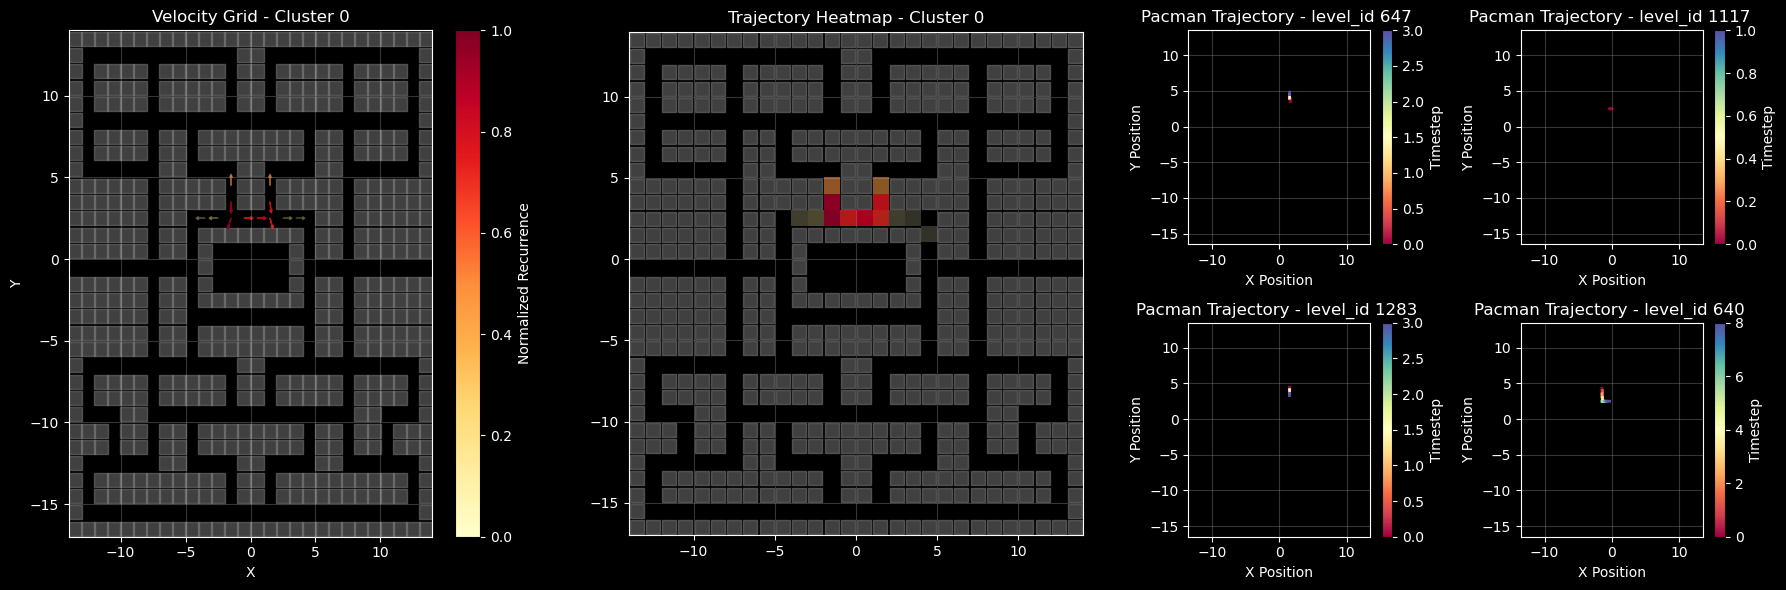

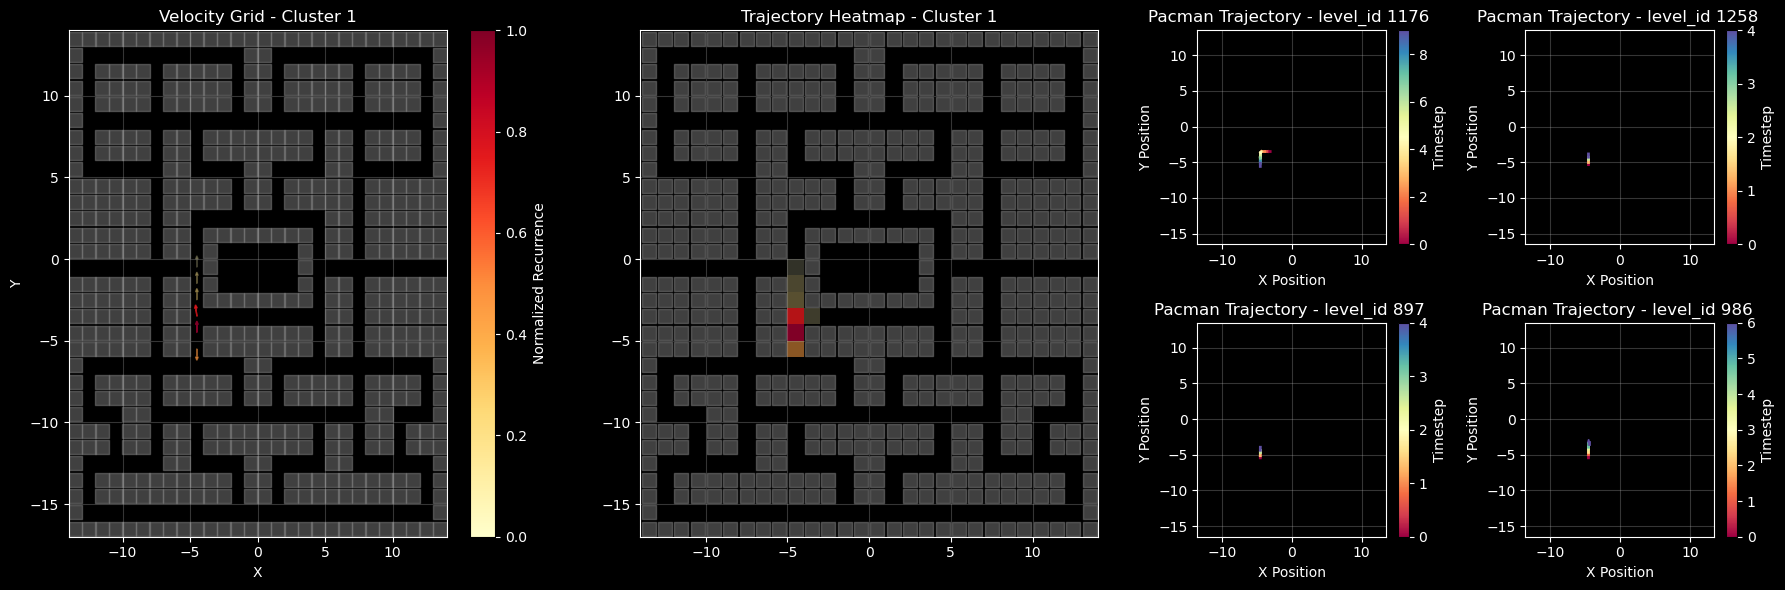

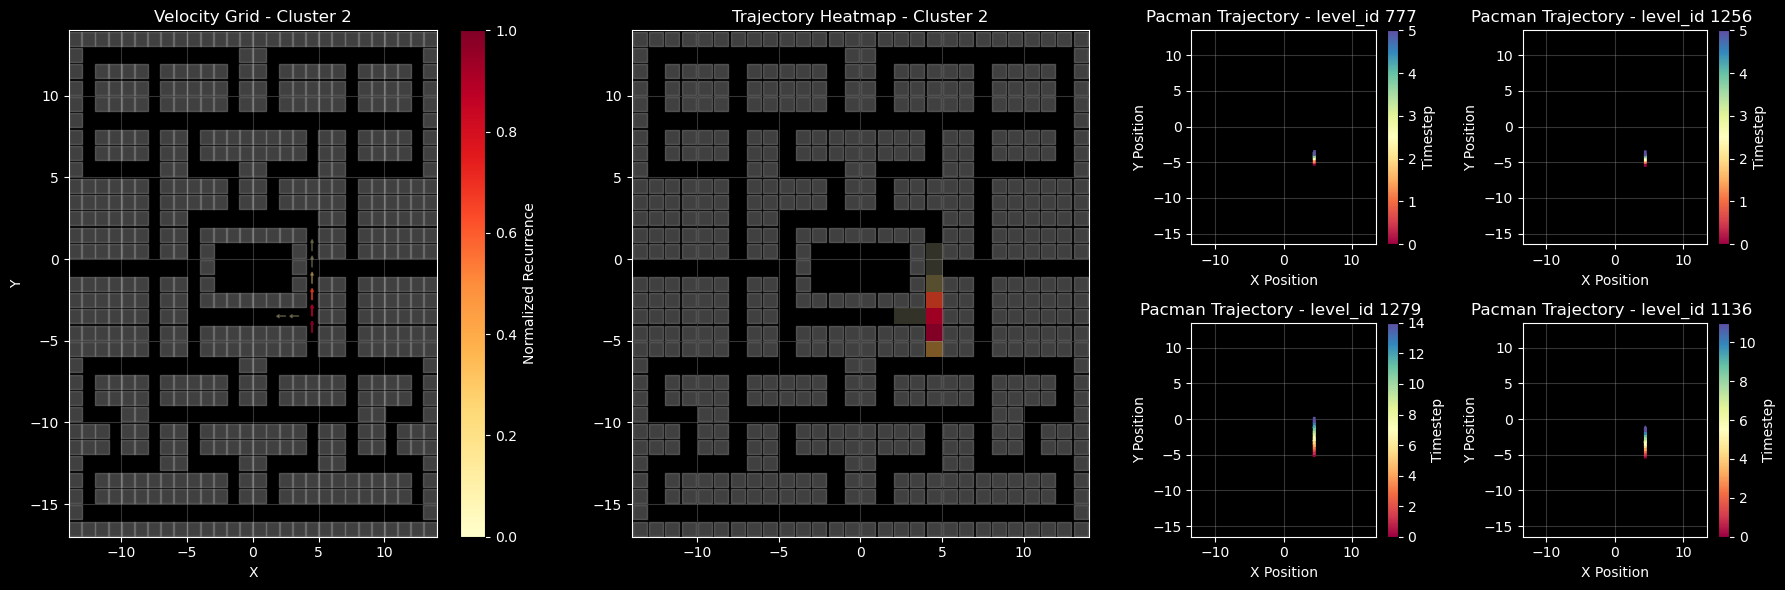

In [133]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=False)
for cluster_id in np.unique(Clustering.labels)[:5]:
     Clustering.plot_cluster_overview(cluster_id=cluster_id)



## Aggression 3 - Ghost Kills

In [115]:
BEHAV_TYPE = "Aggression3"
VALUE_TYPE = "instant_timestep"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
0,1338,74,Aggression3,0,1243323,1243343,18.389999,18.389999,1243333.0,"(-10.502352714539, -12.367035865784)",18.389999,NaN,NaN,NaN
1,1338,74,Aggression3,1,1243329,1243349,18.690001,18.690001,1243339.0,"(-8.1967010498047, -12.500619888306)",18.690001,NaN,NaN,NaN
2,1338,74,Aggression3,2,1243340,1243360,19.240000,19.240000,1243350.0,"(-7.4964542388916, -9.4635725021362)",19.240000,NaN,NaN,NaN
3,1338,74,Aggression3,3,1243475,1243495,25.990000,25.990000,1243485.0,"(-12.504857063293, 9.2714891433716)",25.990000,NaN,NaN,NaN
4,1338,74,Aggression3,4,1243680,1243700,36.240002,36.240002,1243690.0,"(11.712596893311, 12.501050949097)",36.240002,NaN,NaN,NaN


In [ ]:
samples = Beh_encodings.instance_details[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE].sample(5, random_state=42)
for i,sample in samples.iterrows():
    _ = Beh_encodings.create_replay(sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}")

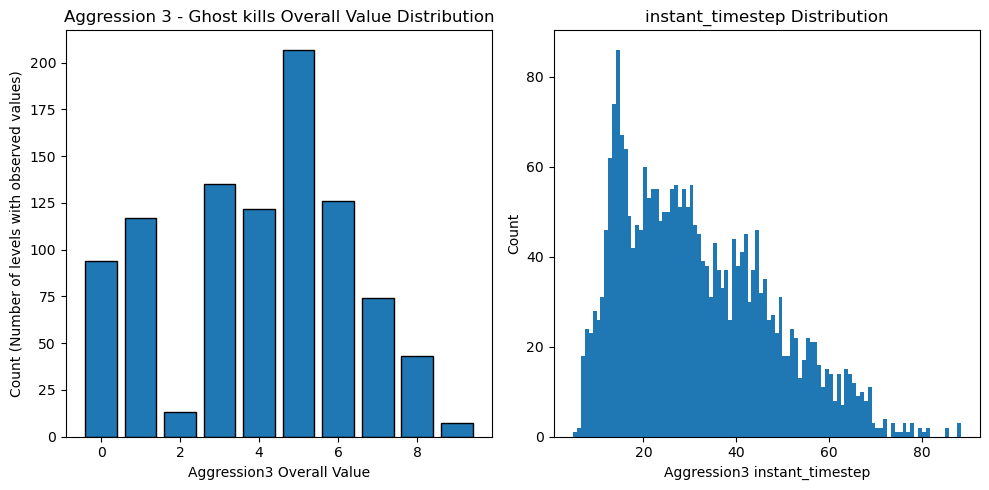

In [116]:
# BEHAV_TYPE = "Aggression1"

# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0] ## Filtering out 0 values
values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].bar(values.unique(), values.value_counts(), edgecolor='black')  
# axs[0].violinplot(values) 
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution")


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")
plt.tight_layout()
plt.show()

# Beh_encodings.summary_results[
#     (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] < 200)
#     & (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] > 50)
# ].loc[
#     :,
#     [
#         "level_id",
#         f"{BEHAV_TYPE}_gamesteps",
#         f"{BEHAV_TYPE}_timesteps",
#         f"{BEHAV_TYPE}_value",
#     ],
# ]

In [ ]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv'):
    Clustering.affinity_matrix = np.loadtxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', delimiter=',')
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
    np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')


INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw


Number of trajectories: 2635


INFO - src.analysis.geom_clustering - Fitting clustering model with 2635 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.29 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 36 clusters


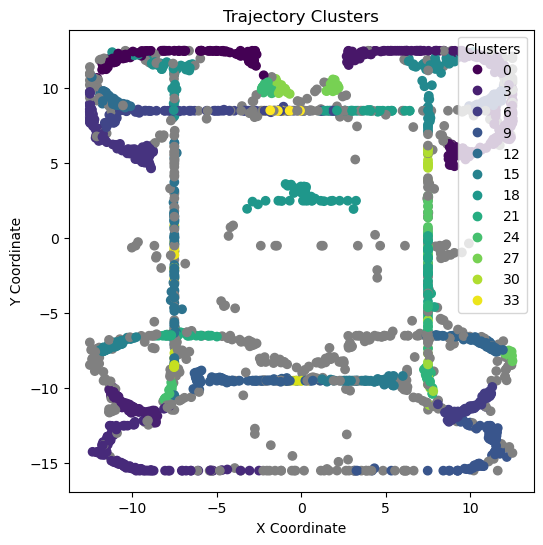

In [120]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=False)
# for cluster_id in np.unique(Clustering.labels)[:5]:
#     Clustering.plot_cluster_overview(cluster_id=cluster_id)



## Aggression 4 Hunt Ghosts after Powerpill


In [94]:
BEHAV_TYPE = "Aggression4"
VALUE_TYPE = "value_per_pill"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
19,1336,74,Aggression4,2,1241289,1241298,21.98,22.430000,NaN,NaN,NaN,3.0,False,NaN
65,1330,74,Aggression4,3,1234535,1234544,18.75,19.200001,NaN,NaN,NaN,3.0,False,NaN
88,1327,74,Aggression4,1,1230805,1230814,22.24,22.690001,NaN,NaN,NaN,2.0,False,NaN
131,1320,74,Aggression4,3,1223682,1223691,15.35,15.790000,NaN,NaN,NaN,4.0,False,NaN
146,1318,74,Aggression4,1,1221869,1221874,37.34,37.590000,NaN,NaN,NaN,6.0,True,NaN


In [ ]:
samples = Beh_encodings.instance_details[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE].sample(5, random_state=42)
for i,sample in samples.iterrows():
    _ = Beh_encodings.create_replay(sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}")

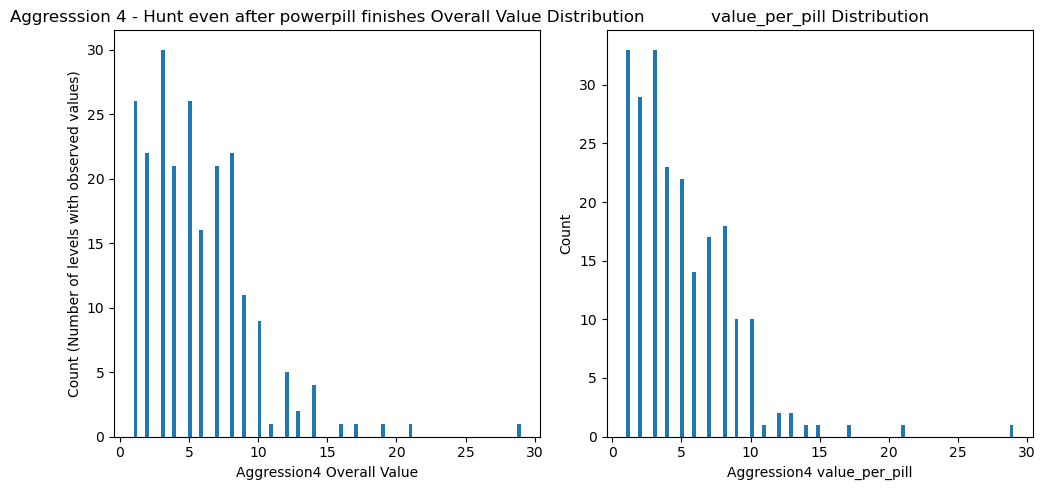

In [97]:
# BEHAV_TYPE = "Aggression1"

values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0] ## Filtering out 0 values
# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(values, bins=100)  
# axs[0].violinplot(values) 
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution")


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")
plt.tight_layout()
plt.show()

# Beh_encodings.summary_results[
#     (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] < 200)
#     & (Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] > 50)
# ].loc[
#     :,
#     [
#         "level_id",
#         f"{BEHAV_TYPE}_gamesteps",
#         f"{BEHAV_TYPE}_timesteps",
#         f"{BEHAV_TYPE}_value",
#     ],
# ]

In [ ]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv'):
    Clustering.affinity_matrix = np.loadtxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', delimiter=',')
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
    np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')


INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw
INFO - src.analysis.geom_clustering - Fitting clustering model with 219 trajectories
INFO - src.analysis.geom_clustering - Calculating affinity matrix


Number of trajectories for Aggression4: 219


Calculating affinity matrix: 100%|██████████| 23871/23871 [00:03<00:00, 7255.33it/s]
INFO - src.analysis.geom_clustering - Affinity matrix calculation complete in 3.29 seconds
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.0 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 3 clusters


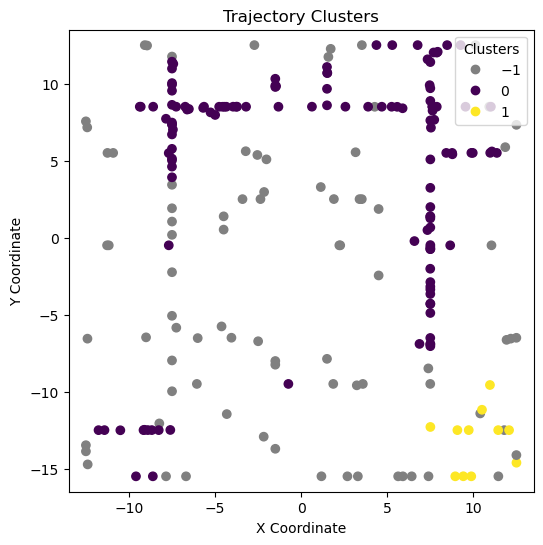

In [101]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=True)
# for cluster_id in np.unique(Clustering.labels)[:5]:
#     Clustering.plot_cluster_overview(cluster_id=cluster_id)



## Aggression 6 - Chase Ghosts or Collect Dots

In [121]:
BEHAV_TYPE = "Aggression6"
VALUE_TYPE = "value_per_pill"  # Or value_per_instance , value_per_pill, died, etc.

Beh_encodings.instance_details[
    (Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE)
].head()

,level_id,user_id,behavlet_name,instance_idx,start_gamestep,end_gamestep,start_timestep,end_timestep,instant_gamestep,instant_position,instant_timestep,value_per_pill,died,value_per_instance
5,1338,74,Aggression6,0,1243479,1243579,25.690001,30.690001,NaN,NaN,NaN,0.030,NaN,NaN
6,1338,74,Aggression6,1,1243681,1243781,35.790001,40.790001,NaN,NaN,NaN,0.060,NaN,NaN
7,1338,74,Aggression6,3,1243318,1243418,17.639999,22.639999,NaN,NaN,NaN,0.450,NaN,NaN
13,1337,74,Aggression6,0,1242731,1242851,53.889999,59.889999,NaN,NaN,NaN,0.025,NaN,NaN
14,1337,74,Aggression6,1,1242466,1242586,40.639999,46.639999,NaN,NaN,NaN,0.450,NaN,NaN


In [ ]:
samples = Beh_encodings.instance_details[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE].sample(5, random_state=42)
for i,sample in samples.iterrows():
    _ = Beh_encodings.create_replay(sample, folder_path="../temp", path_suffix=f"_level_{sample.level_id}")

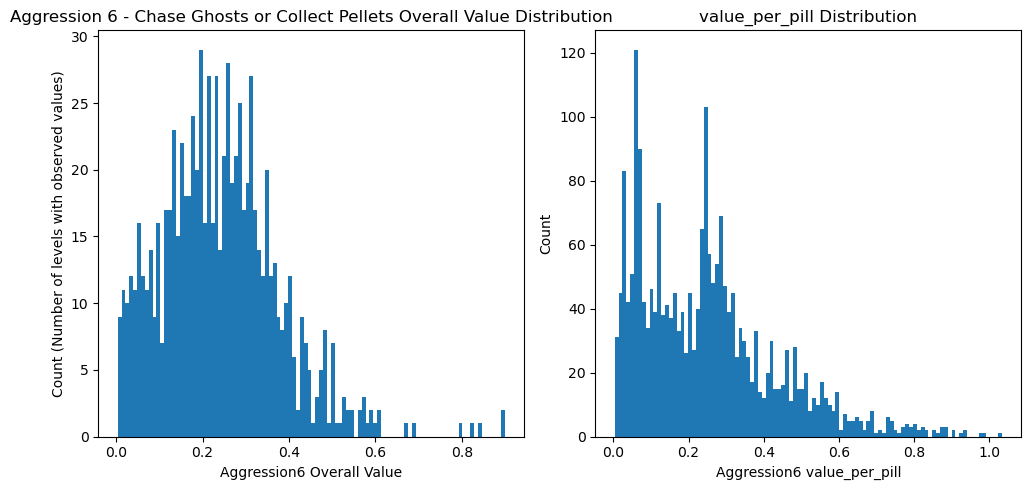

In [122]:


## TODO overview this whithout the distance threshold constrain

values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"][Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"] != 0] ## Filtering out 0 values
# values = Beh_encodings.summary_results[f"{BEHAV_TYPE}_value"]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist(values, bins=100)  
# axs[0].violinplot(values) 
axs[0].set_xlabel(f"{BEHAV_TYPE} Overall Value")
axs[0].set_ylabel("Count (Number of levels with observed values)")
axs[0].set_title(f"{Beh_encodings.behavlets[BEHAV_TYPE].full_name} Overall Value Distribution")


# VALUE_TYPE = "value_per_instance"  # Or value_per_instance , value_per_pill, died, etc.
instance_values = Beh_encodings.instance_details.loc[Beh_encodings.instance_details["behavlet_name"] == BEHAV_TYPE, VALUE_TYPE]
axs[1].hist(instance_values, bins=100)
axs[1].set_xlabel(f"{BEHAV_TYPE} {VALUE_TYPE}")
axs[1].set_ylabel("Count")
axs[1].set_title(f"{VALUE_TYPE} Distribution")
plt.tight_layout()
plt.show()



In [ ]:
trajectories = Beh_encodings.get_trajectories(BEHAV_TYPE)

print(f"Number of trajectories: {len(trajectories)}")

# vis.plot_velocity_grid(trajectory=trajectories)

Clustering = GeomClustering(verbose=True, similarity_measure="dtw")

if os.path.exists(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv'):
    Clustering.affinity_matrix = np.loadtxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', delimiter=',')
    if Clustering.affinity_matrix.shape[0] != len(trajectories):
        Clustering.calculate_affinity_matrix(trajectories=trajectories)
        np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')

    labels = Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
else:
    ## Save affinity matrix after longer calculations (as DTW)
    Clustering.fit(trajectories=trajectories, min_cluster_size = 10)
    np.savetxt(f'affinity_matrices/{BEHAV_TYPE}_dtw_affinity_matrix.csv', Clustering.affinity_matrix, delimiter=',')


INFO - src.analysis.geom_clustering - Initializing GeomClustering with similarity measure: dtw


Number of trajectories: 2189


INFO - src.analysis.geom_clustering - Fitting clustering model with 2189 trajectories
INFO - src.analysis.geom_clustering - Using existing affinity matrix
INFO - src.analysis.geom_clustering - Starting HDBSCAN clustering with min_cluster_size=10 and min_samples=None
INFO - src.analysis.geom_clustering - HDBSCAN clustering complete in 0.17 seconds
INFO - src.analysis.geom_clustering - Clustering complete. Found 16 clusters


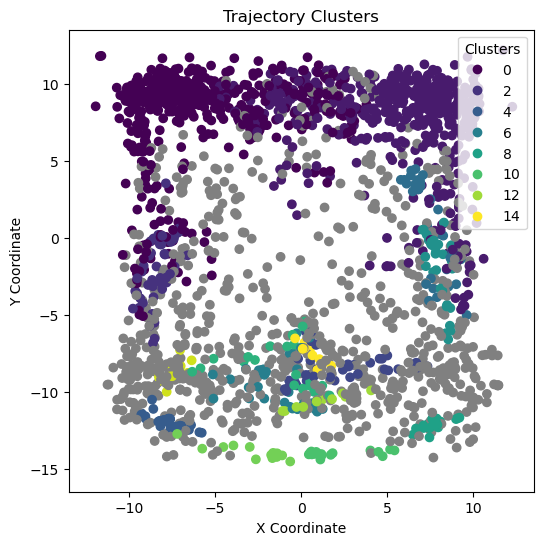

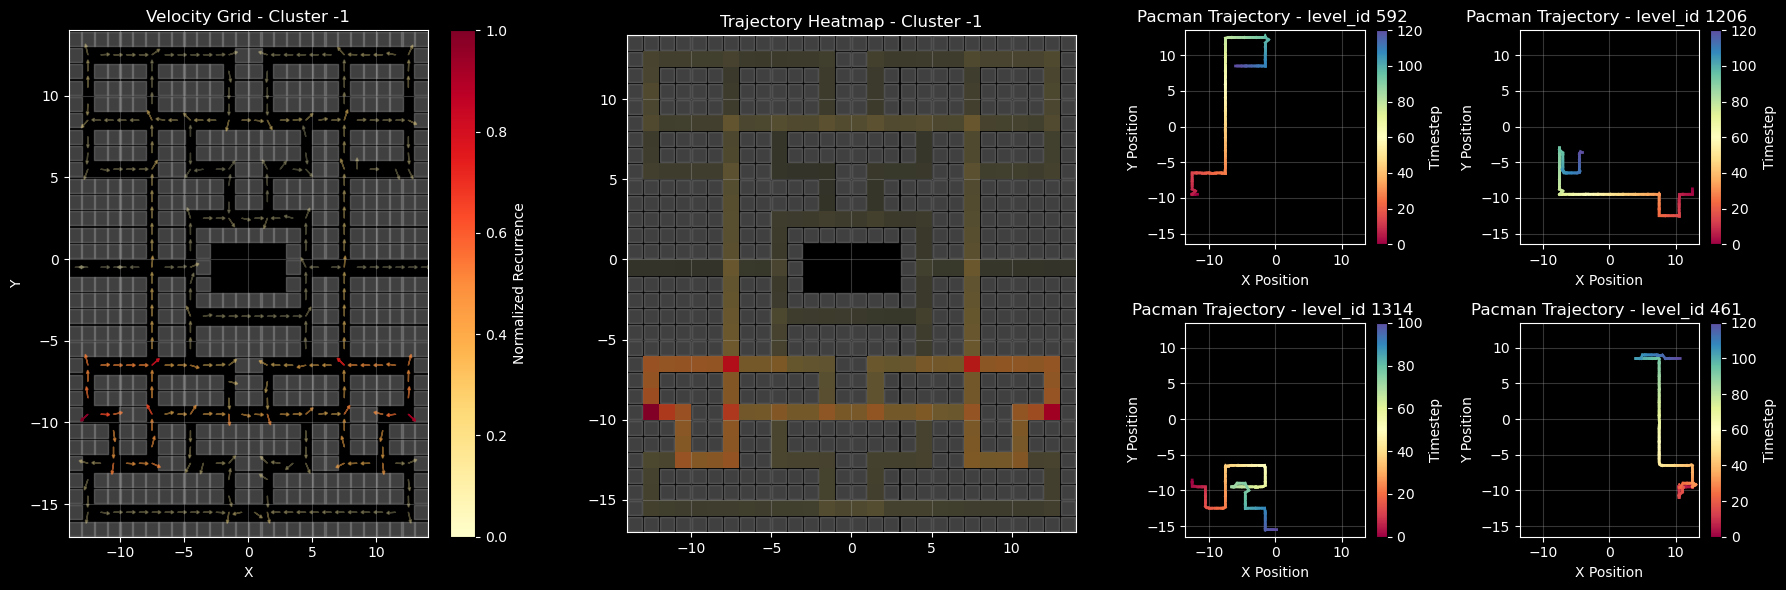

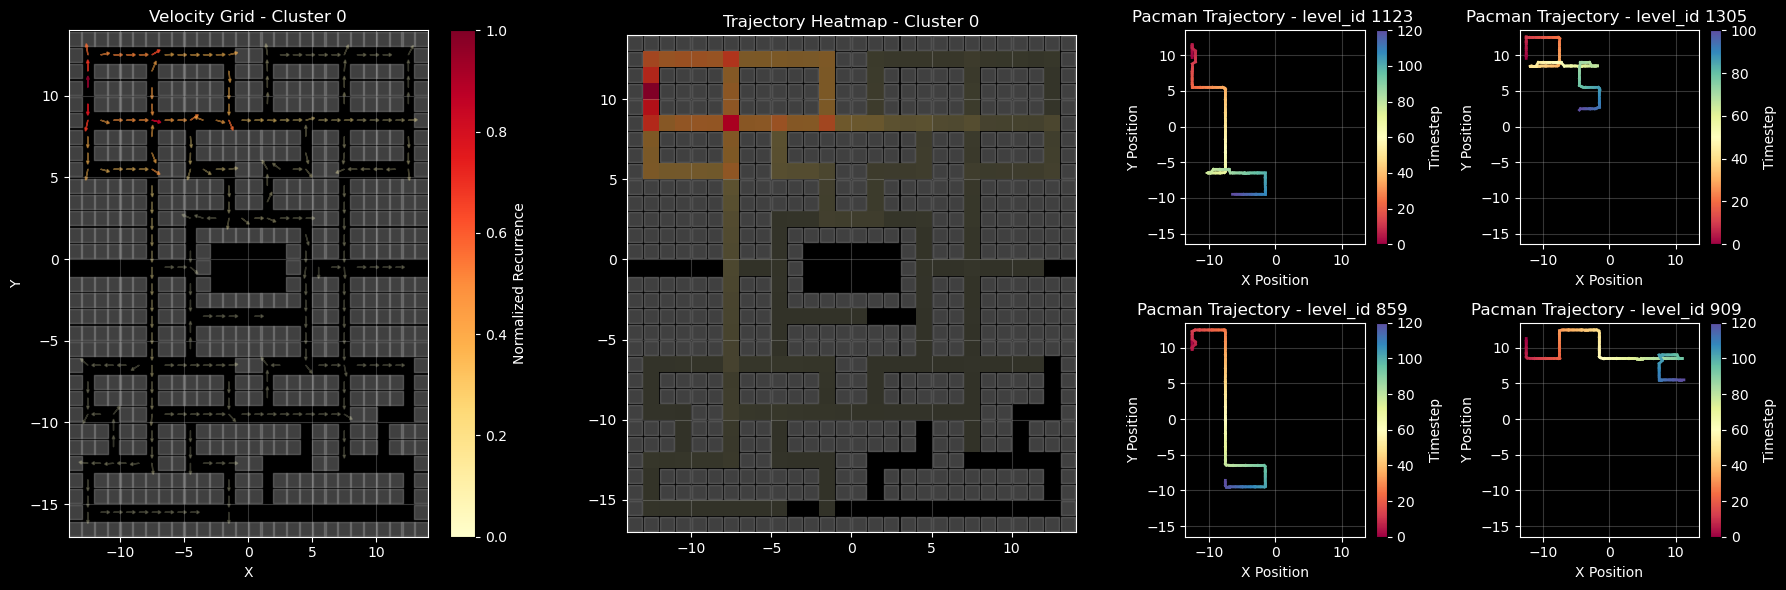

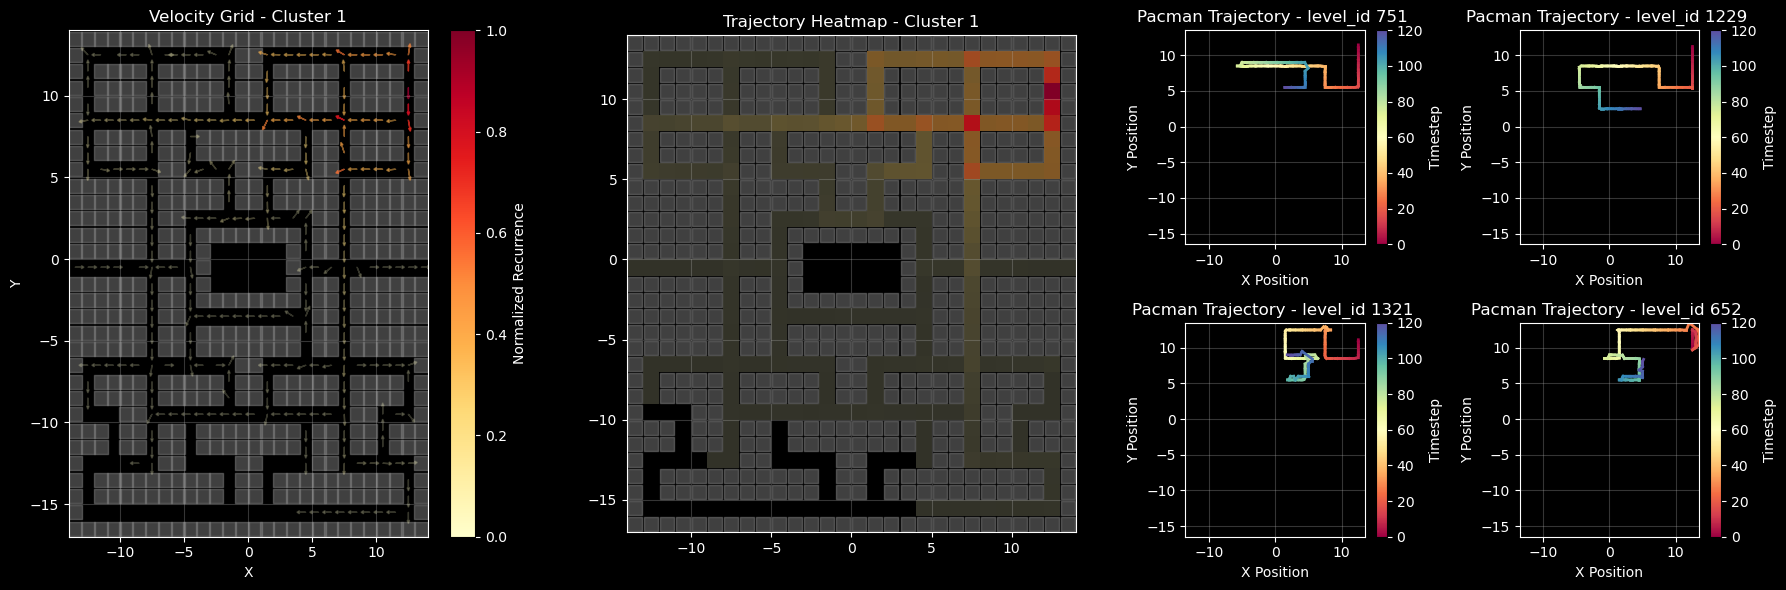

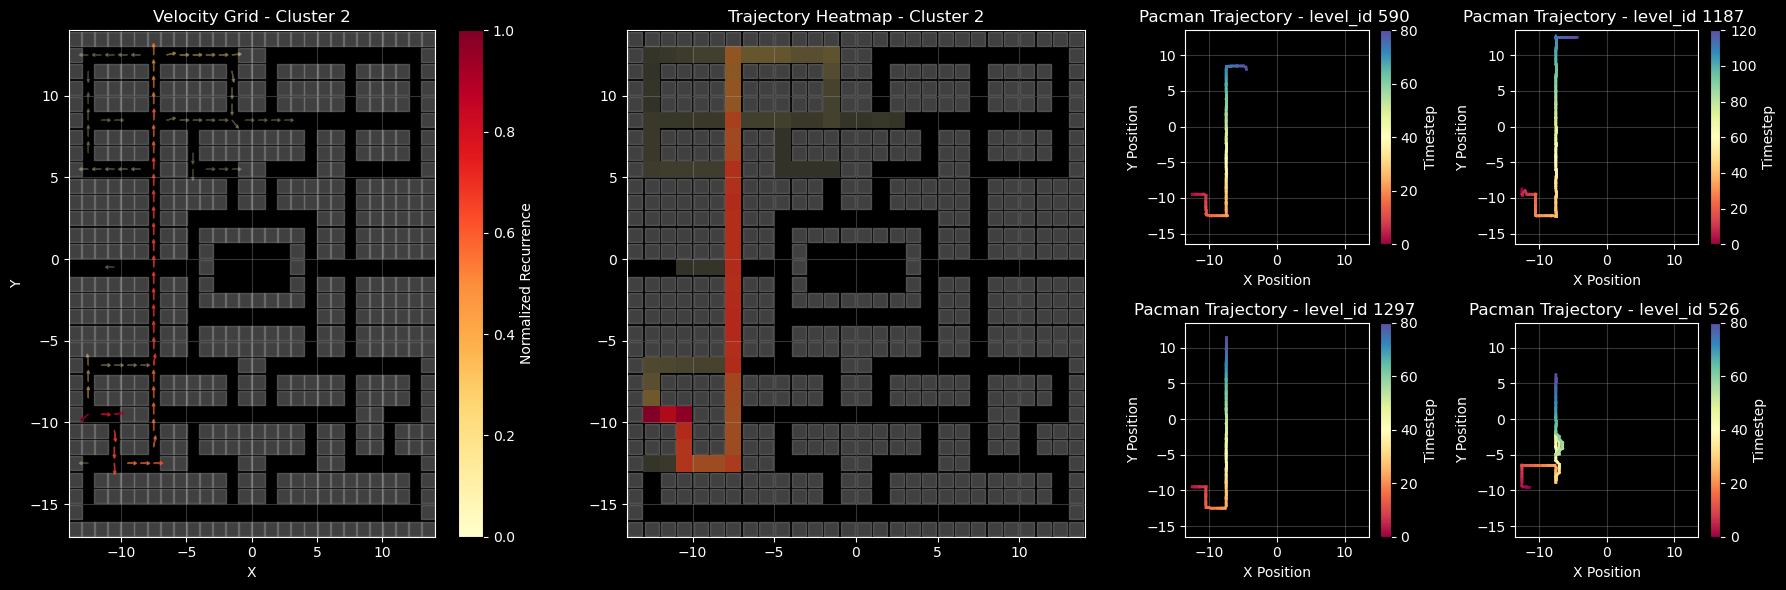

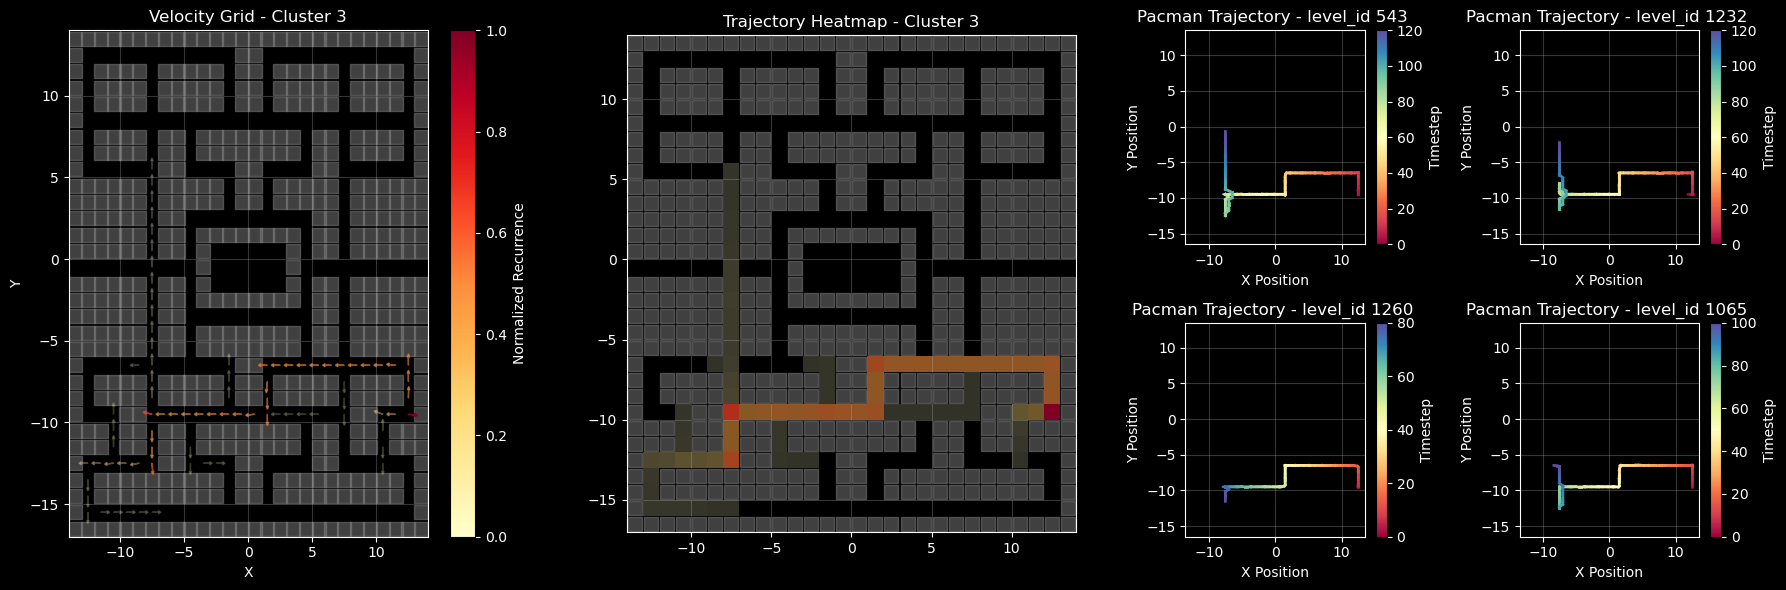

In [125]:
# Clustering.plot_affinity_matrix_overview()
Clustering.plot_trajectories_embedding(frame_to_maze=True)
for cluster_id in np.unique(Clustering.labels)[:5]:
    Clustering.plot_cluster_overview(cluster_id=cluster_id)

In [144]:
Beh_encodings.get_vector_encodings()

,Aggression1_value,Aggression3_value,Aggression4_value,Aggression6_value
1338,0,5,0,0.180000
1337,0,5,0,0.230556
1336,0,3,3,0.475000
1335,0,6,0,0.479167
1334,0,4,0,0.150000
...,...,...,...,...
392,0,6,5,0.477518
391,0,4,0,0.398960
390,0,3,0,0.164880
389,0,2,0,0.180000


# Caution 1
